Firstly, we are going to need a data set. So lets try generating one. So, just to be clear, we want our data to have many dimensions, also, we want our data to lie in a lower dimensional manifold.  

Let try a simple example first.  
A plane in a 3D space is an example of a lower dimensional manifold in a higher dimensional space.

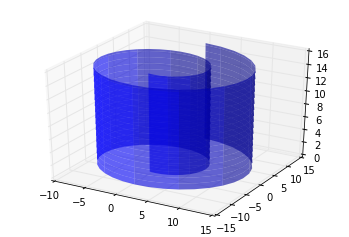

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

n = 50
x = np.linspace(3*np.pi/2,9*np.pi/2,n)
y = np.linspace(0,15,n)
X, Y = np.meshgrid(x, y)

def swiss_roll(x,y):
    return x*np.cos(x), x*np.sin(x), y
Z1,Z2,Z3 = swiss_roll(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Z1,Z2,Z3,rstride=3,cstride =3,linewidth=0, alpha = 0.6)

Cool. Notice that the equations describing the swiss roll are two dimensional z1 = X np.cos(X), z2 = X np.sin(X), 
z3 = Y. Depend only on X and Y. 

So some question we would be interested in are;
* how do data points move across the surface of the manifold for different X and Y?
* can we flatten the swiss roll in two dimensions?

Note, depending on how the training data points are distributed on the surface, it could be 1D.

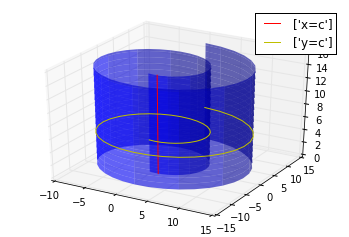

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Z1,Z2,Z3,rstride=3,cstride =3,linewidth=0, alpha = 0.6)

#for a constant x value
xc = np.linspace(5,5,n)
z1,z2,z3 = swiss_roll(xc,y)
ax.plot(z1,z2,zs = z3,c='r',label = ['x=c'])

#for a constant y value
yc = np.linspace(5,5,n)
z1,z2,z3 = swiss_roll(x,yc)
ax.plot(z1,z2,zs = z3,c='y',label = ['y=c'])
ax.legend()

Now we actually see that 

How does flattening the manifold help us? 




We can easily make some more complicated manifolds to work with.

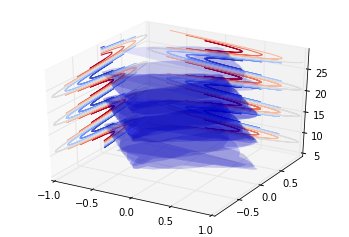

In [124]:
def manifold(x,y):
    return np.cos(y)*np.sin(x), np.cos(x)*np.sin(y), y+x

Z1,Z2,Z3 = manifold(X,Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Z1,Z2,Z3,rstride=3,cstride =3,linewidth=0, alpha = 0.1)

cset = ax.contour(Z1,Z2,Z3, zdir='x', offset=-1, cmap=cm.coolwarm)
cset = ax.contour(Z1,Z2,Z3, zdir='y', offset=1, cmap=cm.coolwarm)

What are the limits to complexity of a manifold produced by n-variables? Can a 2 variable system produce a spherical manifold? A sphere is 3D, but it has symmetry which could allow it to be produced by just 1 or 2 dimensions? A proof for this would be nice.

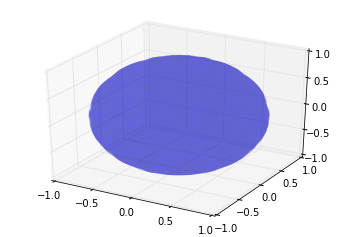

In [131]:
def sphere(x,y):
    return 1, x , y

def pol2cart(rho, phi, psi):
    x = rho * np.cos(phi) * np.cos(psi)
    y = rho * np.cos(phi) * np.sin(psi)
    z = rho * np.sin(phi)
    return x , y , z

xs = np.linspace(0.001,2*np.pi,n)
ys = np.linspace(0.001,2*np.pi,n)
Xs, Ys = np.meshgrid(xs, ys)
rho, phi, psi = sphere(Xs,Ys)
Z1,Z2,Z3 = pol2cart(rho, phi, psi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Z1,Z2,Z3,rstride=3,cstride =3,linewidth=0, alpha = 0.2)



Questions
* So this is about discovering hidden variables?
* How does this related to chaotic systems?
* How do we know that y is not dependent on x? What if it was?